# F1 Standings Prediction

# Importing Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
# Loading the dataset
file_path = "f1_enhanced_race_data_final.csv"
df = pd.read_csv(file_path)

In [3]:
df.head()

,Season,Round,Race Name,Circuit Name,Location,Race Date,Driver Name,Driver ID,Driver Nationality,Constructor,...,Q3 Time,Starting Grid Position,Final Position,Finishing Status,Time/Status,Points,Laps Completed,Driver Total Points,Pit Stop Count,Pit Stop Details
0,2010,1,Bahrain Grand Prix,Bahrain International Circuit,Sakhir,2010-03-14,Fernando Alonso,alonso,Spanish,Ferrari,...,1:54.608,3,1,Finished,1:39:20.396,25.0,49,25.0,0,No Pitstops
1,2010,1,Bahrain Grand Prix,Bahrain International Circuit,Sakhir,2010-03-14,Felipe Massa,massa,Brazilian,Ferrari,...,1:54.242,2,2,Finished,+16.099,18.0,49,18.0,0,No Pitstops
2,2010,1,Bahrain Grand Prix,Bahrain International Circuit,Sakhir,2010-03-14,Lewis Hamilton,hamilton,British,McLaren,...,1:55.217,4,3,Finished,+23.182,15.0,49,15.0,0,No Pitstops
3,2010,1,Bahrain Grand Prix,Bahrain International Circuit,Sakhir,2010-03-14,Sebastian Vettel,vettel,German,Red Bull,...,1:54.101,1,4,Finished,+38.799,12.0,49,12.0,0,No Pitstops
4,2010,1,Bahrain Grand Prix,Bahrain International Circuit,Sakhir,2010-03-14,Nico Rosberg,rosberg,German,Mercedes,...,1:55.241,5,5,Finished,+40.213,10.0,49,10.0,0,No Pitstops


# Feature Engineering

#### 1. Drop primary key-type columns (non-useful unique identifiers)

In [4]:
columns_to_drop = ["Driver Name", "Race Date"]  # Assuming these are unique identifiers
df_cleaned = df.drop(columns=columns_to_drop, errors='ignore')

In [5]:
df_cleaned.head()

,Season,Round,Race Name,Circuit Name,Location,Driver ID,Driver Nationality,Constructor,Qualifying Position,Q1 Time,...,Q3 Time,Starting Grid Position,Final Position,Finishing Status,Time/Status,Points,Laps Completed,Driver Total Points,Pit Stop Count,Pit Stop Details
0,2010,1,Bahrain Grand Prix,Bahrain International Circuit,Sakhir,alonso,Spanish,Ferrari,3.0,1:54.612,...,1:54.608,3,1,Finished,1:39:20.396,25.0,49,25.0,0,No Pitstops
1,2010,1,Bahrain Grand Prix,Bahrain International Circuit,Sakhir,massa,Brazilian,Ferrari,2.0,1:55.313,...,1:54.242,2,2,Finished,+16.099,18.0,49,18.0,0,No Pitstops
2,2010,1,Bahrain Grand Prix,Bahrain International Circuit,Sakhir,hamilton,British,McLaren,4.0,1:55.341,...,1:55.217,4,3,Finished,+23.182,15.0,49,15.0,0,No Pitstops
3,2010,1,Bahrain Grand Prix,Bahrain International Circuit,Sakhir,vettel,German,Red Bull,1.0,1:55.029,...,1:54.101,1,4,Finished,+38.799,12.0,49,12.0,0,No Pitstops
4,2010,1,Bahrain Grand Prix,Bahrain International Circuit,Sakhir,rosberg,German,Mercedes,5.0,1:55.463,...,1:55.241,5,5,Finished,+40.213,10.0,49,10.0,0,No Pitstops


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6436 entries, 0 to 6435
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Season                  6436 non-null   int64  
 1   Round                   6436 non-null   int64  
 2   Race Name               6436 non-null   object 
 3   Circuit Name            6436 non-null   object 
 4   Location                6436 non-null   object 
 5   Race Date               6436 non-null   object 
 6   Driver Name             6436 non-null   object 
 7   Driver ID               6436 non-null   object 
 8   Driver Nationality      6436 non-null   object 
 9   Constructor             6436 non-null   object 
 10  Qualifying Position     6412 non-null   float64
 11  Q1 Time                 6350 non-null   object 
 12  Q2 Time                 4669 non-null   object 
 13  Q3 Time                 2941 non-null   object 
 14  Starting Grid Position  6436 non-null   

In [7]:
df.isnull().sum()

Season                       0
Round                        0
Race Name                    0
Circuit Name                 0
Location                     0
Race Date                    0
Driver Name                  0
Driver ID                    0
Driver Nationality           0
Constructor                  0
Qualifying Position         24
Q1 Time                     86
Q2 Time                   1767
Q3 Time                   3495
Starting Grid Position       0
Final Position               0
Finishing Status             0
Time/Status                  0
Points                       0
Laps Completed               0
Driver Total Points          4
Pit Stop Count               0
Pit Stop Details             0
dtype: int64

#### 2. Handle missing values: Fill numerical with median, categorical wiath mode

In [8]:
for column in df_cleaned.columns:
    if df_cleaned[column].dtype == 'object':
        df_cleaned[column].fillna(df_cleaned[column].mode()[0], inplace=True)
    else:
        df_cleaned[column].fillna(df_cleaned[column].median(), inplace=True)

/var/folders/dl/h_6q3nx12sq_jjk207bbhds40000gn/T/ipykernel_60544/1510372845.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[column].fillna(df_cleaned[column].median(), inplace=True)
/var/folders/dl/h_6q3nx12sq_jjk207bbhds40000gn/T/ipykernel_60544/1510372845.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are

In [9]:
df_cleaned.isnull().sum()

Season                    0
Round                     0
Race Name                 0
Circuit Name              0
Location                  0
Driver ID                 0
Driver Nationality        0
Constructor               0
Qualifying Position       0
Q1 Time                   0
Q2 Time                   0
Q3 Time                   0
Starting Grid Position    0
Final Position            0
Finishing Status          0
Time/Status               0
Points                    0
Laps Completed            0
Driver Total Points       0
Pit Stop Count            0
Pit Stop Details          0
dtype: int64

In [10]:
df_cleaned.head()

,Season,Round,Race Name,Circuit Name,Location,Driver ID,Driver Nationality,Constructor,Qualifying Position,Q1 Time,...,Q3 Time,Starting Grid Position,Final Position,Finishing Status,Time/Status,Points,Laps Completed,Driver Total Points,Pit Stop Count,Pit Stop Details
0,2010,1,Bahrain Grand Prix,Bahrain International Circuit,Sakhir,alonso,Spanish,Ferrari,3.0,1:54.612,...,1:54.608,3,1,Finished,1:39:20.396,25.0,49,25.0,0,No Pitstops
1,2010,1,Bahrain Grand Prix,Bahrain International Circuit,Sakhir,massa,Brazilian,Ferrari,2.0,1:55.313,...,1:54.242,2,2,Finished,+16.099,18.0,49,18.0,0,No Pitstops
2,2010,1,Bahrain Grand Prix,Bahrain International Circuit,Sakhir,hamilton,British,McLaren,4.0,1:55.341,...,1:55.217,4,3,Finished,+23.182,15.0,49,15.0,0,No Pitstops
3,2010,1,Bahrain Grand Prix,Bahrain International Circuit,Sakhir,vettel,German,Red Bull,1.0,1:55.029,...,1:54.101,1,4,Finished,+38.799,12.0,49,12.0,0,No Pitstops
4,2010,1,Bahrain Grand Prix,Bahrain International Circuit,Sakhir,rosberg,German,Mercedes,5.0,1:55.463,...,1:55.241,5,5,Finished,+40.213,10.0,49,10.0,0,No Pitstops


#### 3. Convert categorical values to numerical using label encoding

In [11]:
unwanted_columns = ['Pit Stop Details', 'Q1 Time', 'Q2 Time', 'Q3 Time']
label_encoders = {}
for column in df_cleaned.select_dtypes(include=['object']).columns:
    if column not in unwanted_columns :
        le = LabelEncoder()
        df_cleaned[column] = le.fit_transform(df_cleaned[column])
        label_encoders[column] = le

In [12]:
df_cleaned.head()

,Season,Round,Race Name,Circuit Name,Location,Driver ID,Driver Nationality,Constructor,Qualifying Position,Q1 Time,...,Q3 Time,Starting Grid Position,Final Position,Finishing Status,Time/Status,Points,Laps Completed,Driver Total Points,Pit Stop Count,Pit Stop Details
0,2010,1,5,7,23,3,23,5,3.0,1:54.612,...,1:54.608,3,1,36,3200,25.0,49,25.0,0,No Pitstops
1,2010,1,5,7,23,44,5,5,2.0,1:55.313,...,1:54.242,2,2,36,290,18.0,49,18.0,0,No Pitstops
2,2010,1,5,7,23,25,6,13,4.0,1:55.341,...,1:55.217,4,3,36,1486,15.0,49,15.0,0,No Pitstops
3,2010,1,5,7,23,75,13,17,1.0,1:55.029,...,1:54.101,1,4,36,2048,12.0,49,12.0,0,No Pitstops
4,2010,1,5,7,23,62,13,14,5.0,1:55.463,...,1:55.241,5,5,36,2137,10.0,49,10.0,0,No Pitstops


#### 4. Converting mintues (object type) to secs (float type) in qualifiers time columns

In [13]:
qualifiers = ['Q1 Time', 'Q2 Time', 'Q3 Time']

for col in qualifiers:
    df_cleaned[col] = df_cleaned[col].apply(lambda x: float(x.split(':')[0]) * 60 + float(x.split(':')[1]))

In [14]:
df_cleaned.head()

,Season,Round,Race Name,Circuit Name,Location,Driver ID,Driver Nationality,Constructor,Qualifying Position,Q1 Time,...,Q3 Time,Starting Grid Position,Final Position,Finishing Status,Time/Status,Points,Laps Completed,Driver Total Points,Pit Stop Count,Pit Stop Details
0,2010,1,5,7,23,3,23,5,3.0,114.612,...,114.608,3,1,36,3200,25.0,49,25.0,0,No Pitstops
1,2010,1,5,7,23,44,5,5,2.0,115.313,...,114.242,2,2,36,290,18.0,49,18.0,0,No Pitstops
2,2010,1,5,7,23,25,6,13,4.0,115.341,...,115.217,4,3,36,1486,15.0,49,15.0,0,No Pitstops
3,2010,1,5,7,23,75,13,17,1.0,115.029,...,114.101,1,4,36,2048,12.0,49,12.0,0,No Pitstops
4,2010,1,5,7,23,62,13,14,5.0,115.463,...,115.241,5,5,36,2137,10.0,49,10.0,0,No Pitstops


#### 5. Dropping Time/Status column

In [15]:
df_cleaned.drop('Time/Status', inplace=True, axis=1)

In [16]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6436 entries, 0 to 6435
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Season                  6436 non-null   int64  
 1   Round                   6436 non-null   int64  
 2   Race Name               6436 non-null   int64  
 3   Circuit Name            6436 non-null   int64  
 4   Location                6436 non-null   int64  
 5   Driver ID               6436 non-null   int64  
 6   Driver Nationality      6436 non-null   int64  
 7   Constructor             6436 non-null   int64  
 8   Qualifying Position     6436 non-null   float64
 9   Q1 Time                 6436 non-null   float64
 10  Q2 Time                 6436 non-null   float64
 11  Q3 Time                 6436 non-null   float64
 12  Starting Grid Position  6436 non-null   int64  
 13  Final Position          6436 non-null   int64  
 14  Finishing Status        6436 non-null   

<Axes: xlabel='Points'>

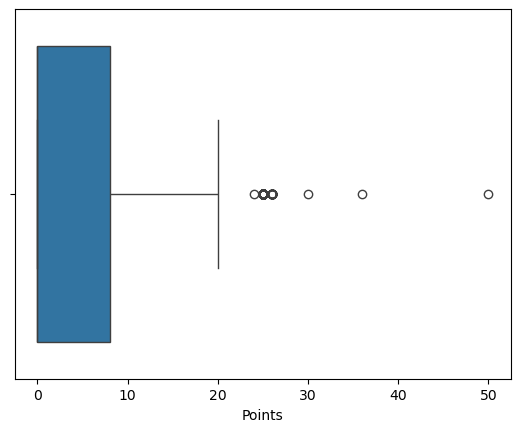

In [17]:
sns.boxplot(x=df['Points'])

In [18]:
# Remove outliers that are more than 25
df_cleaned = df_cleaned[df_cleaned['Points'] <= 25]

<Axes: xlabel='Points'>

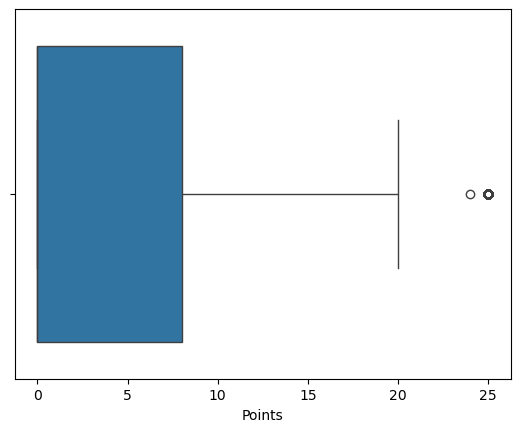

In [19]:
sns.boxplot(x=df_cleaned['Points'])

In [20]:
df_cleaned.head()

,Season,Round,Race Name,Circuit Name,Location,Driver ID,Driver Nationality,Constructor,Qualifying Position,Q1 Time,Q2 Time,Q3 Time,Starting Grid Position,Final Position,Finishing Status,Points,Laps Completed,Driver Total Points,Pit Stop Count,Pit Stop Details
0,2010,1,5,7,23,3,23,5,3.0,114.612,114.172,114.608,3,1,36,25.0,49,25.0,0,No Pitstops
1,2010,1,5,7,23,44,5,5,2.0,115.313,114.331,114.242,2,2,36,18.0,49,18.0,0,No Pitstops
2,2010,1,5,7,23,25,6,13,4.0,115.341,114.707,115.217,4,3,36,15.0,49,15.0,0,No Pitstops
3,2010,1,5,7,23,75,13,17,1.0,115.029,113.883,114.101,1,4,36,12.0,49,12.0,0,No Pitstops
4,2010,1,5,7,23,62,13,14,5.0,115.463,114.682,115.241,5,5,36,10.0,49,10.0,0,No Pitstops


#### 6. Processing pitstop details column

In [21]:
df_cleaned['Pit Stop Count'].unique()

array([0, 2, 3, 1, 4, 6, 5, 7])

In [22]:
# Function to process pit stop details into separate columns
def process_pit_stop_details(details, max_pitstops):
    lap_columns = [f"Pitstop_{i+1}_Lap" for i in range(max_pitstops)]
    duration_columns = [f"Pitstop_{i+1}_Duration" for i in range(max_pitstops)]
    
    # Initialize empty columns
    processed_data = {col: [] for col in lap_columns + duration_columns}

    for detail in details:
        # Handle No Pitstops rows
        if detail == "No Pitstops":
            for i in range(max_pitstops):
                processed_data[f"Pitstop_{i+1}_Lap"].append(0)
                processed_data[f"Pitstop_{i+1}_Duration"].append(0)
        else:
            # Split individual pit stops
            stops = detail.split(";")
            
            for i in range(max_pitstops):
                if i < len(stops) and stops[i].strip():
                    stop_info = stops[i]
                    lap = int(stop_info.split("@Lap ")[1].split("(")[0].strip())
                    duration_str = stop_info.split("Duration=")[1].replace("s", "").strip("()")

                    # Convert duration to seconds if it's in MM:SS.mmm format
                    if ":" in duration_str:
                        minutes, seconds = map(float, duration_str.split(":"))
                        duration = minutes * 60 + seconds
                    else:
                        duration = float(duration_str)

                    processed_data[f"Pitstop_{i+1}_Lap"].append(lap)
                    processed_data[f"Pitstop_{i+1}_Duration"].append(duration)
                else:
                    # Fill missing stops with 0
                    processed_data[f"Pitstop_{i+1}_Lap"].append(0)
                    processed_data[f"Pitstop_{i+1}_Duration"].append(0)
    
    return pd.DataFrame(processed_data)

In [23]:
# Apply transformation
processed_pitstops = process_pit_stop_details(df_cleaned["Pit Stop Details"], max_pitstops=7)

In [24]:
processed_pitstops.tail()

,Pitstop_1_Lap,Pitstop_2_Lap,Pitstop_3_Lap,Pitstop_4_Lap,Pitstop_5_Lap,Pitstop_6_Lap,Pitstop_7_Lap,Pitstop_1_Duration,Pitstop_2_Duration,Pitstop_3_Duration,Pitstop_4_Duration,Pitstop_5_Duration,Pitstop_6_Duration,Pitstop_7_Duration
6391,12,29,30,55,0,0,0,26.363,21.678,22.815,22.09,0.0,0.0,0.0
6392,23,24,29,0,0,0,0,23.415,22.565,32.317,0.00,0.0,0.0,0.0
6393,6,0,0,0,0,0,0,41.144,0.000,0.000,0.00,0.0,0.0,0.0
6394,3,0,0,0,0,0,0,24.941,0.000,0.000,0.00,0.0,0.0,0.0
6395,0,0,0,0,0,0,0,0.000,0.000,0.000,0.00,0.0,0.0,0.0


In [25]:
# Combine with original data
final_df_cleaned = pd.concat([df_cleaned, processed_pitstops], axis=1)

In [26]:
final_df_cleaned.head()

,Season,Round,Race Name,Circuit Name,Location,Driver ID,Driver Nationality,Constructor,Qualifying Position,Q1 Time,...,Pitstop_5_Lap,Pitstop_6_Lap,Pitstop_7_Lap,Pitstop_1_Duration,Pitstop_2_Duration,Pitstop_3_Duration,Pitstop_4_Duration,Pitstop_5_Duration,Pitstop_6_Duration,Pitstop_7_Duration
0,2010.0,1.0,5.0,7.0,23.0,3.0,23.0,5.0,3.0,114.612,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2010.0,1.0,5.0,7.0,23.0,44.0,5.0,5.0,2.0,115.313,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2010.0,1.0,5.0,7.0,23.0,25.0,6.0,13.0,4.0,115.341,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2010.0,1.0,5.0,7.0,23.0,75.0,13.0,17.0,1.0,115.029,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2010.0,1.0,5.0,7.0,23.0,62.0,13.0,14.0,5.0,115.463,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
final_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6436 entries, 0 to 6356
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Season                  6396 non-null   float64
 1   Round                   6396 non-null   float64
 2   Race Name               6396 non-null   float64
 3   Circuit Name            6396 non-null   float64
 4   Location                6396 non-null   float64
 5   Driver ID               6396 non-null   float64
 6   Driver Nationality      6396 non-null   float64
 7   Constructor             6396 non-null   float64
 8   Qualifying Position     6396 non-null   float64
 9   Q1 Time                 6396 non-null   float64
 10  Q2 Time                 6396 non-null   float64
 11  Q3 Time                 6396 non-null   float64
 12  Starting Grid Position  6396 non-null   float64
 13  Final Position          6396 non-null   float64
 14  Finishing Status        6396 non-null   float

In [28]:
final_df_cleaned.drop(['Pit Stop Details', 'Driver Nationality'], axis=1, inplace=True)

#### 7. Re-arranging Columns

In [29]:
# re-arranging Columns
target_col = 'Final Position'
columns = [col for col in final_df_cleaned.columns if col != target_col] + [target_col]
final_df_cleaned = final_df_cleaned[columns]

In [30]:
final_df_cleaned.head()

,Season,Round,Race Name,Circuit Name,Location,Driver ID,Constructor,Qualifying Position,Q1 Time,Q2 Time,...,Pitstop_6_Lap,Pitstop_7_Lap,Pitstop_1_Duration,Pitstop_2_Duration,Pitstop_3_Duration,Pitstop_4_Duration,Pitstop_5_Duration,Pitstop_6_Duration,Pitstop_7_Duration,Final Position
0,2010.0,1.0,5.0,7.0,23.0,3.0,5.0,3.0,114.612,114.172,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2010.0,1.0,5.0,7.0,23.0,44.0,5.0,2.0,115.313,114.331,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,2010.0,1.0,5.0,7.0,23.0,25.0,13.0,4.0,115.341,114.707,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,2010.0,1.0,5.0,7.0,23.0,75.0,17.0,1.0,115.029,113.883,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
4,2010.0,1.0,5.0,7.0,23.0,62.0,14.0,5.0,115.463,114.682,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


In [31]:
final_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6436 entries, 0 to 6356
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Season                  6396 non-null   float64
 1   Round                   6396 non-null   float64
 2   Race Name               6396 non-null   float64
 3   Circuit Name            6396 non-null   float64
 4   Location                6396 non-null   float64
 5   Driver ID               6396 non-null   float64
 6   Constructor             6396 non-null   float64
 7   Qualifying Position     6396 non-null   float64
 8   Q1 Time                 6396 non-null   float64
 9   Q2 Time                 6396 non-null   float64
 10  Q3 Time                 6396 non-null   float64
 11  Starting Grid Position  6396 non-null   float64
 12  Finishing Status        6396 non-null   float64
 13  Points                  6396 non-null   float64
 14  Laps Completed          6396 non-null   float

#### 8. Save the cleaned dataset

In [32]:
final_df_cleaned.to_csv("cleaned_f1_data.csv", index=False)

# Exploratory Data Analysis

#### 1. Distribution of Finishing Positions

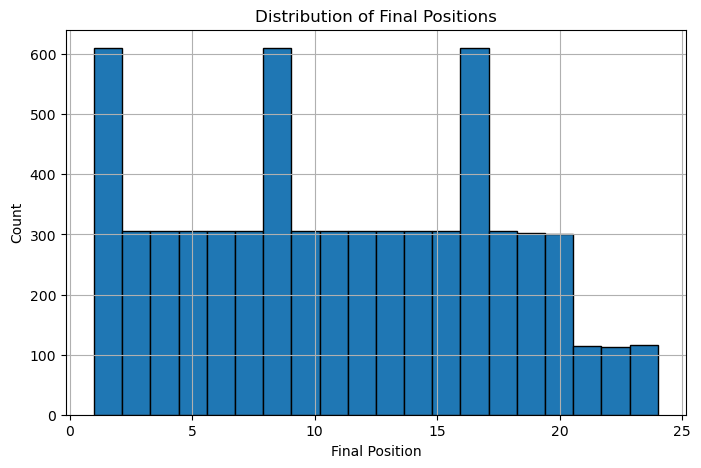

In [32]:
plt.figure(figsize=(8, 5))
final_df_cleaned["Final Position"].hist(bins=20, edgecolor="black")
plt.title("Distribution of Final Positions")
plt.xlabel("Final Position")
plt.ylabel("Count")
plt.show()

#### 2. Number of Races per Season

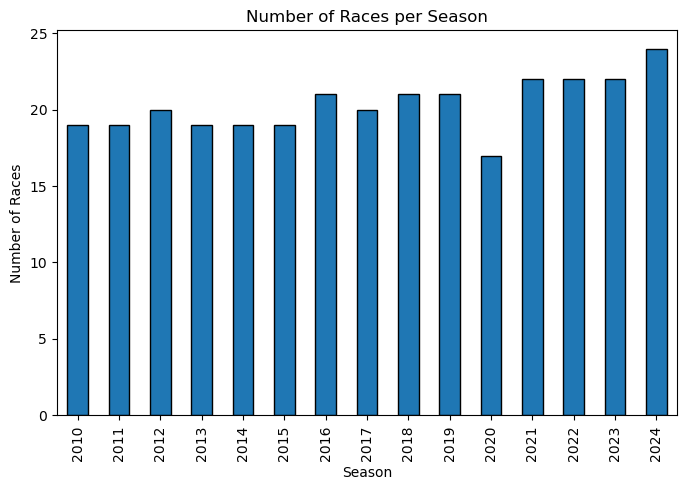

In [33]:
plt.figure(figsize=(8, 5))
final_df_cleaned.groupby("Season")["Race Name"].nunique().plot(kind="bar", edgecolor="black")
plt.title("Number of Races per Season")
plt.xlabel("Season")
plt.ylabel("Number of Races")
plt.show()

#### 3. Constructor Performance (Average Points per Constructor)

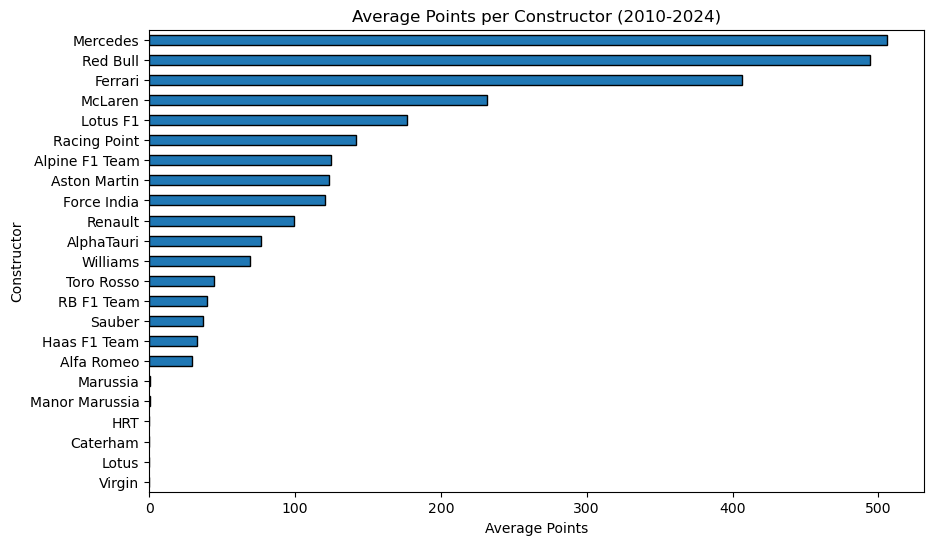

In [34]:
plt.figure(figsize=(10, 6))
constructor_points = df.groupby(["Season", "Constructor"])["Points"].sum().groupby("Constructor").mean()
constructor_points.sort_values().plot(kind="barh", edgecolor="black")
plt.title("Average Points per Constructor (2010-2024)")
plt.xlabel("Average Points")
plt.ylabel("Constructor")
plt.show()

#### 4. Total points scored across all constructors in each season from 2010 to 2024

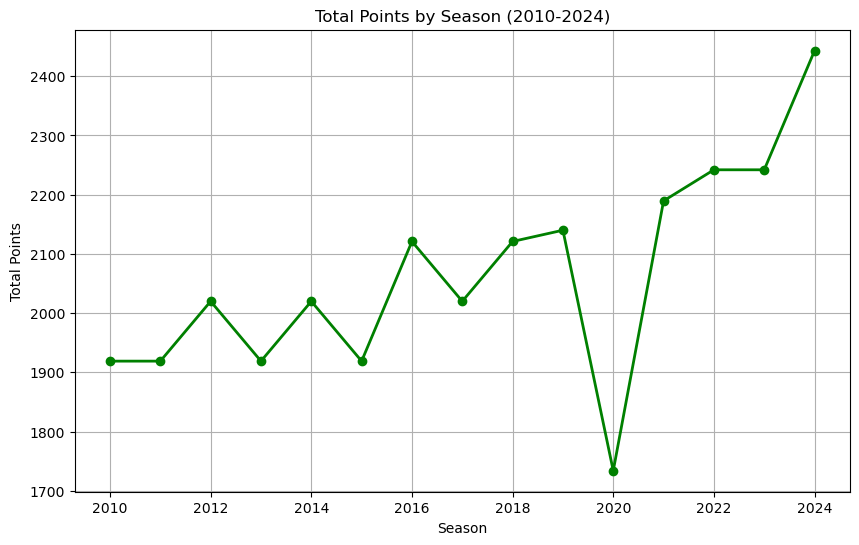

In [35]:
plt.figure(figsize=(10, 6))
total_points_by_season = df.groupby("Season")["Points"].sum()
total_points_by_season.plot(kind="line", marker="o", color="green", linewidth=2)
plt.title("Total Points by Season (2010-2024)")
plt.xlabel("Season")
plt.ylabel("Total Points")
plt.grid(True)
plt.show()

#### 5. Average Laps Completed by Constructors

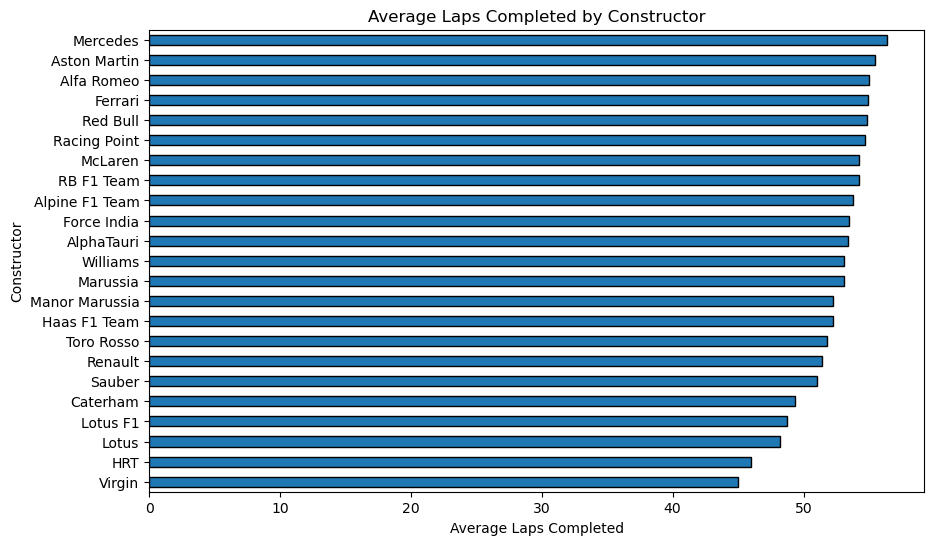

In [36]:
plt.figure(figsize=(10, 6))
df.groupby("Constructor")["Laps Completed"].mean().sort_values().plot(kind="barh", edgecolor="black")
plt.title("Average Laps Completed by Constructor")
plt.xlabel("Average Laps Completed")
plt.ylabel("Constructor")
plt.show()

#### 6. Finishing Status Distribution

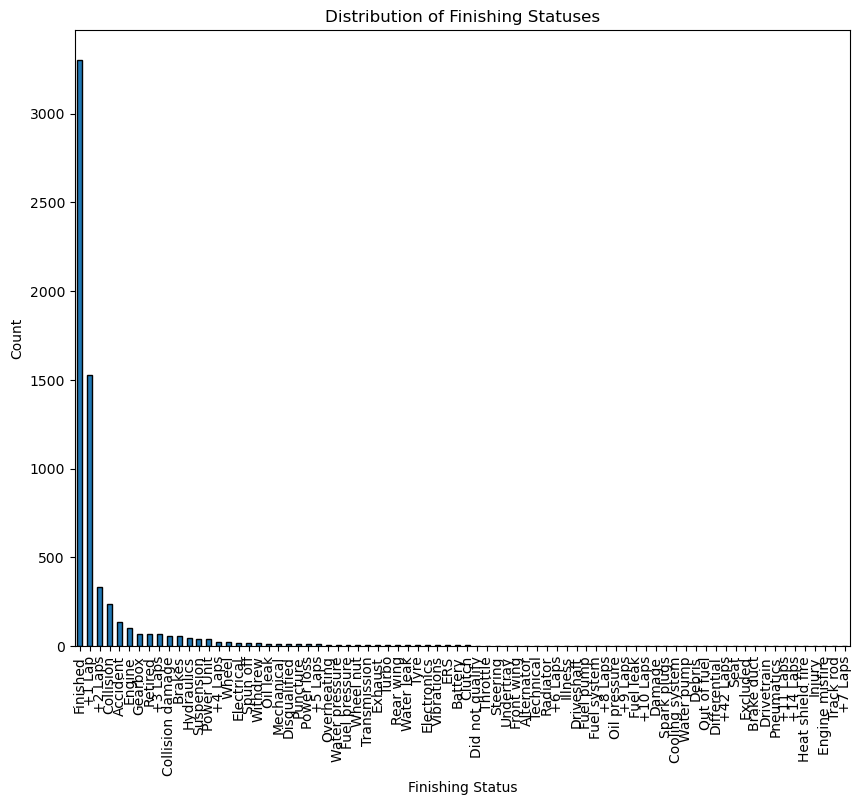

In [37]:
plt.figure(figsize=(10, 8))
df["Finishing Status"].value_counts().plot(kind="bar", edgecolor="black")
plt.title("Distribution of Finishing Statuses")
plt.xlabel("Finishing Status")
plt.ylabel("Count")
plt.show()

#### 7. Correlation Heatmap

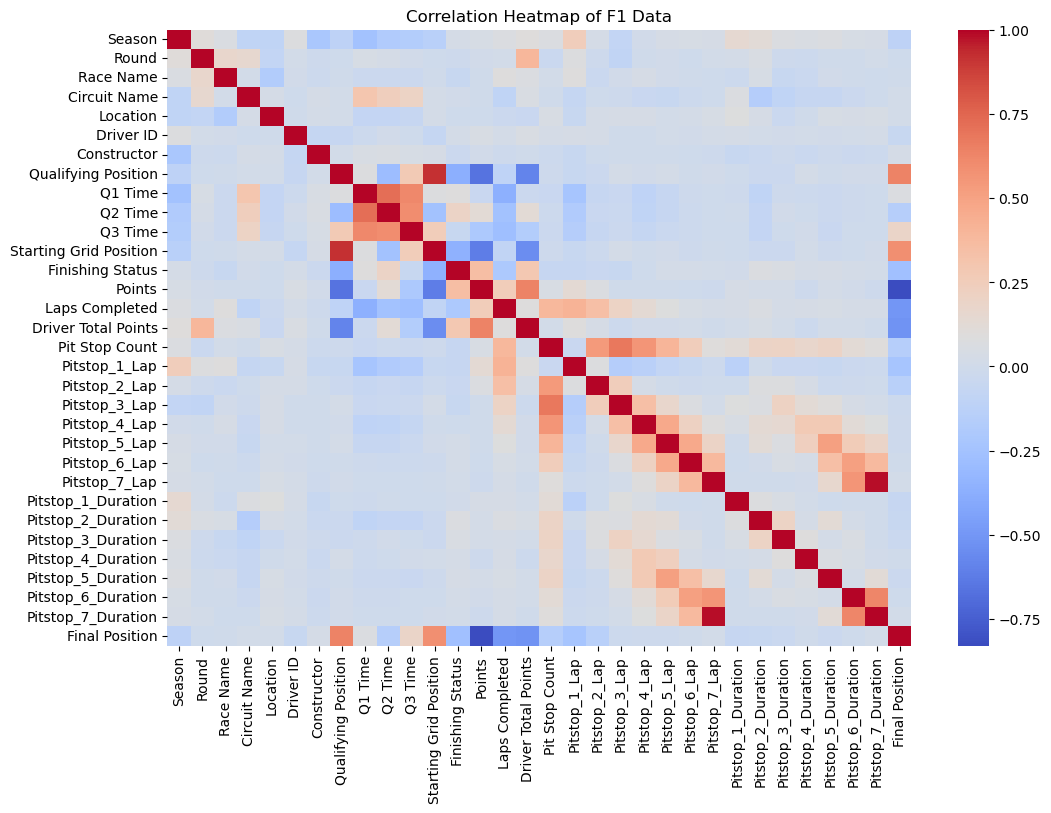

In [38]:
plt.figure(figsize=(12, 8))
sns.heatmap(final_df_cleaned.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of F1 Data")
plt.show()

#### 8. Points Distribution

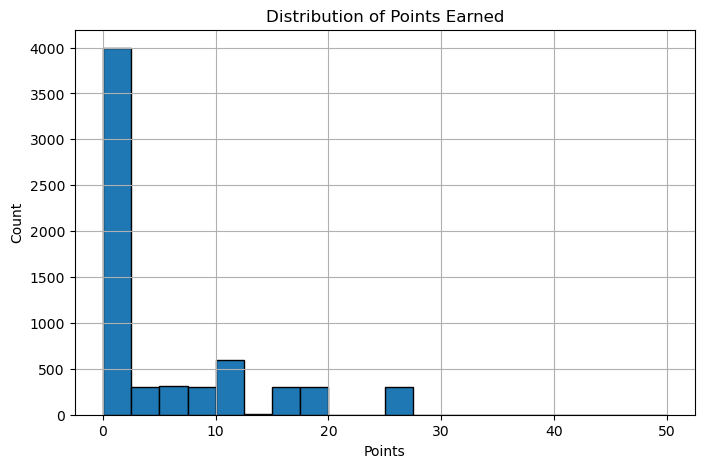

In [39]:
plt.figure(figsize=(8, 5))
final_df_cleaned["Points"].hist(bins=20, edgecolor="black")
plt.title("Distribution of Points Earned")
plt.xlabel("Points")
plt.ylabel("Count")
plt.show()

#### 9. Qualifying Position vs Final Position

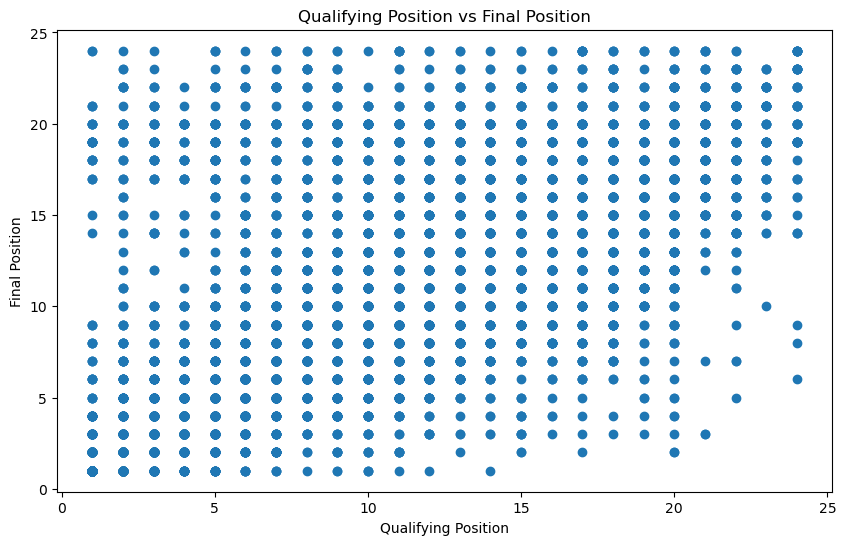

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(final_df_cleaned["Qualifying Position"], df_cleaned["Final Position"])
plt.title("Qualifying Position vs Final Position")
plt.xlabel("Qualifying Position")
plt.ylabel("Final Position")
plt.show()

#### 10. Effect of Laps Completed on Points Earned

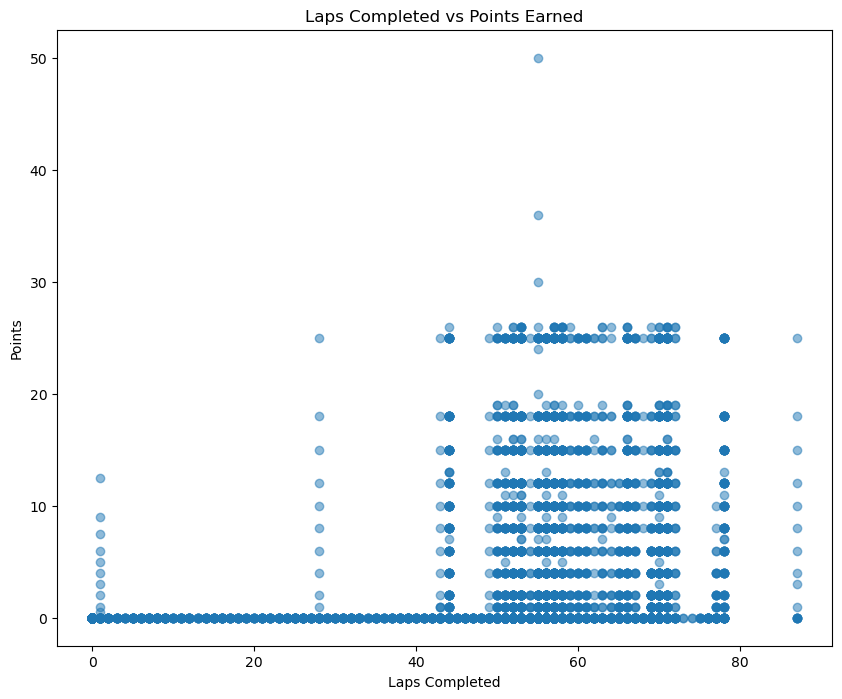

In [41]:
plt.figure(figsize=(10, 8))
plt.scatter(df_cleaned["Laps Completed"], df_cleaned["Points"], alpha=0.5)
plt.title("Laps Completed vs Points Earned")
plt.xlabel("Laps Completed")
plt.ylabel("Points")
plt.show()